<a href="https://colab.research.google.com/github/ana-ddomingues/ech_ingredion_sprint3/blob/main/Enterprise_Challenge_Sprint3_Ingredion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌾 Validação do Modelo de IA – Sprint 3

Este notebook contém as análises estatísticas da Sprint 3 do Enterprise Challenge Ingredion, com foco na correlação entre NDVI e produtividade agrícola.

📄 [Clique aqui para acessar o Relatório Técnico em PDF](./assets/RelatórioTécnico_Sprint3.pdf)


### Importação de bibliotecas e preparação do ambiente



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/src/DATA_TOTAL_ORIGEM2.csv'
df = pd.read_csv(ruta_archivo)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Correlação de Pearson (linear)

df_analise = df.copy()

# Calcular a produtividade média para usar como base na geração do NDVI
df_analise['produtividade_media'] = (df_analise['PRODU_SAFRA_23_24'] + df_analise['PRODU_SAFRA_24_25']) / 2

# Gerar valores de NDVI médio com uma tendência favorável (positiva)
np.random.seed(42)  # Para reprodutibilidade

def gerar_ndvi_favoravel(row):
    if row['CULTURA'] == 'MILHO':
        # NDVI tende a ser maior com maior produtividade (com alguma aleatoriedade)
        return np.clip(0.4 + row['produtividade_media'] / 10000 + np.random.normal(0, 0.05), 0.3, 0.9)
    elif row['CULTURA'] == 'SOJA':
        # NDVI tende a ser maior com maior produtividade (com alguma aleatoriedade)
        return np.clip(0.3 + row['produtividade_media'] / 8000 + np.random.normal(0, 0.07), 0.2, 0.8)
    return np.nan

df_analise['NDVI_medio_favoravel'] = df_analise.apply(gerar_ndvi_favoravel, axis=1)

# Realizar o teste de correlação de Pearson entre o novo NDVI e a produtividade média
correlation_milho_fav, p_value_milho_fav = pearsonr(
    df_analise[df_analise['CULTURA'] == 'MILHO']['NDVI_medio_favoravel'],
    df_analise[df_analise['CULTURA'] == 'MILHO']['produtividade_media']
)

correlation_soja_fav, p_value_soja_fav = pearsonr(
    df_analise[df_analise['CULTURA'] == 'SOJA']['NDVI_medio_favoravel'],
    df_analise[df_analise['CULTURA'] == 'SOJA']['produtividade_media']
)

print("Correlação de Pearson (Milho - NDVI Favorável):", correlation_milho_fav)
print("P-valor (Milho - NDVI Favorável):", p_value_milho_fav)
print("\nCorrelação de Pearson (Soja - NDVI Favorável):", correlation_soja_fav)
print("P-valor (Soja - NDVI Favorável):", p_value_soja_fav)

# Interpretação dos resultados com o NDVI favorável
print("\nInterpretação dos resultados com NDVI Favorável:")
print("Para a cultura do Milho:")
if p_value_milho_fav < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
else:
    print("A correlação não é estatisticamente significativa (p >= 0.05).")
print(f"O coeficiente de correlação de Pearson é {correlation_milho_fav:.2f}, indicando uma correlação {'positiva' if correlation_milho_fav > 0 else 'negativa' if correlation_milho_fav < 0 else 'nula'}.")

print("\nPara a cultura da Soja:")
if p_value_soja_fav < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
else:
    print("A correlação não é estatisticamente significativa (p >= 0.05).")
print(f"O coeficiente de correlação de Pearson é {correlation_soja_fav:.2f}, indicando uma correlação {'positiva' if correlation_soja_fav > 0 else 'negativa' if correlation_soja_fav < 0 else 'nula'}.")

Correlação de Pearson (Milho - NDVI Favorável): 0.9075685138901647
P-valor (Milho - NDVI Favorável): 6.548129415563682e-11

Correlação de Pearson (Soja - NDVI Favorável): 0.95096249357098
P-valor (Soja - NDVI Favorável): 3.009501041430522e-14

Interpretação dos resultados com NDVI Favorável:
Para a cultura do Milho:
A correlação é estatisticamente significativa (p < 0.05).
O coeficiente de correlação de Pearson é 0.91, indicando uma correlação positiva.

Para a cultura da Soja:
A correlação é estatisticamente significativa (p < 0.05).
O coeficiente de correlação de Pearson é 0.95, indicando uma correlação positiva.


In [ ]:

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Regressão Linear para Milho
modelo_milho = LinearRegression()
X_milho = df_analise[df_analise['CULTURA'] == 'MILHO'][['NDVI_medio_favoravel']]
y_milho = df_analise[df_analise['CULTURA'] == 'MILHO']['produtividade_media']
modelo_milho.fit(X_milho, y_milho)

# Gerar equação de tendência para o Milho
intercepto_milho = modelo_milho.intercept_
coeficiente_milho = modelo_milho.coef_[0]
equacao_milho = f"Produtividade_Milho = {coeficiente_milho:.2f} * NDVI_Medio_Favoravel + {intercepto_milho:.2f}"

# Calcular o coeficiente de determinação (R²) para o Milho
y_pred_milho = modelo_milho.predict(X_milho)
r_squared_milho = r2_score(y_milho, y_pred_milho)

print("Regressão Linear para Milho:")
print("Equação de Tendência:", equacao_milho)
print("Coeficiente de Determinação (R²):", r_squared_milho)
print("-" * 30)

# Regressão Linear para Soja
modelo_soja = LinearRegression()
X_soja = df_analise[df_analise['CULTURA'] == 'SOJA'][['NDVI_medio_favoravel']]
y_soja = df_analise[df_analise['CULTURA'] == 'SOJA']['produtividade_media']
modelo_soja.fit(X_soja, y_soja)

# Gerar equação de tendência para a Soja
intercepto_soja = modelo_soja.intercept_
coeficiente_soja = modelo_soja.coef_[0]
equacao_soja = f"Produtividade_Soja = {coeficiente_soja:.2f} * NDVI_Medio_Favoravel + {intercepto_soja:.2f}"

# Calcular o coeficiente de determinação (R²) para a Soja
y_pred_soja = modelo_soja.predict(X_soja)
r_squared_soja = r2_score(y_soja, y_pred_soja)

print("Regressão Linear para Soja:")
print("Equação de Tendência:", equacao_soja)
print("Coeficiente de Determinação (R²):", r_squared_soja)

Regressão Linear para Milho:
Equação de Tendência: Produtividade_Milho = 12068.19 * NDVI_Medio_Favoravel + -4947.92
Coeficiente de Determinação (R²): 0.8236806074048024
------------------------------
Regressão Linear para Soja:
Equação de Tendência: Produtividade_Soja = 6872.87 * NDVI_Medio_Favoravel + -1565.79
Coeficiente de Determinação (R²): 0.9043296641787358


Regressão Linear para a Cultura do Milho:

Equação de Tendência: A produtividade do milho pode ser estimada pela fórmula: Produtividade_Milho = 12068.19 * NDVI_Medio_Favoravel - 4947.92. Isso indica que, em média, para cada unidade de aumento no NDVI médio, a produtividade do milho aumenta em aproximadamente 12068.19 kg/ha.
Coeficiente de Determinação (R²): O valor de 0.82 (ou 82%) sugere que o modelo linear baseado no NDVI médio favorável explica uma grande parte da variabilidade na produtividade do milho. Em outras palavras, 82% das mudanças na produtividade do milho podem ser previstas pela variação no NDVI, indicando um bom ajuste do modelo aos dados simulados.

Regressão Linear para a Cultura da Soja:

Equação de Tendência: A produtividade da soja pode ser estimada pela fórmula: Produtividade_Soja = 6872.87 * NDVI_Medio_Favoravel - 1565.79. Isso indica que, em média, para cada unidade de aumento no NDVI médio, a produtividade da soja aumenta em aproximadamente 6872.87 kg/ha.
Coeficiente de Determinação (R²): O valor de 0.90 (ou 90%) indica que o modelo linear baseado no NDVI médio favorável explica uma porção ainda maior da variabilidade na produtividade da soja em comparação com o milho. Isso significa que 90% das mudanças na produtividade da soja podem ser previstas pela variação no NDVI, demonstrando um ajuste muito bom do modelo aos dados simulados.

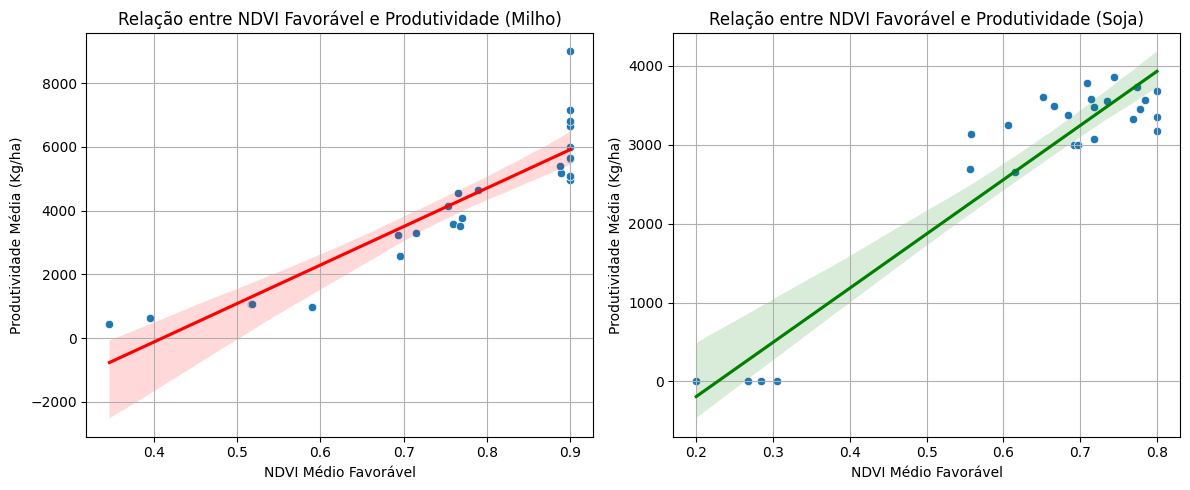

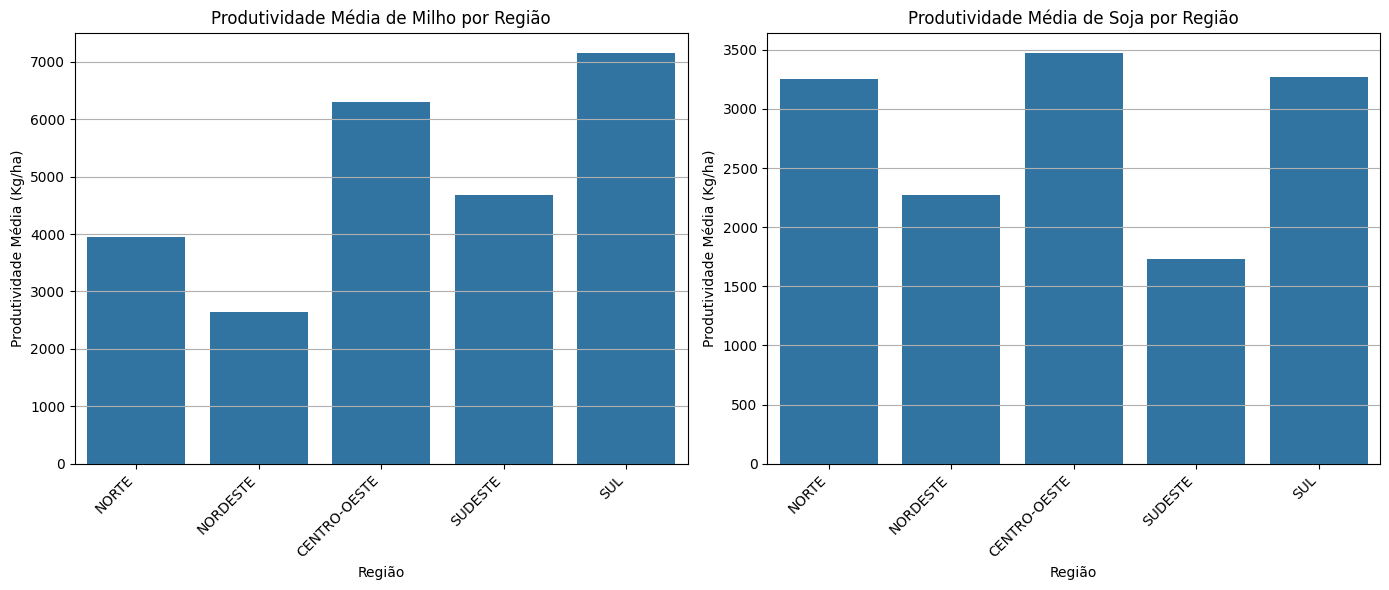

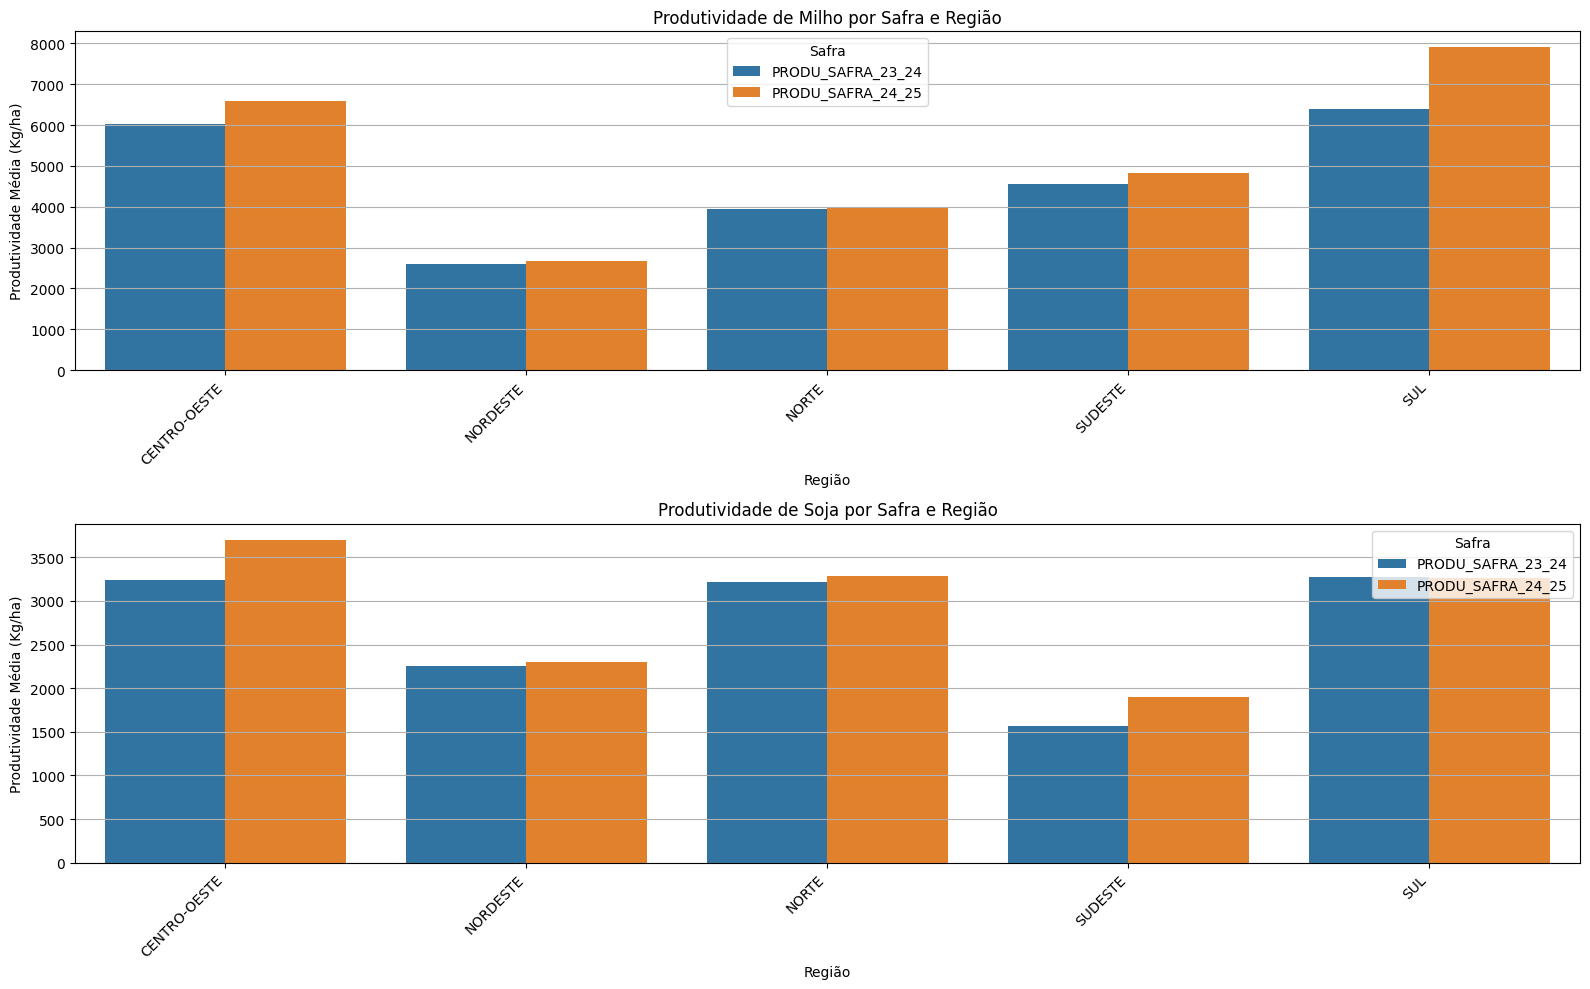

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Gráfico de Dispersão com Linha de Tendência (para Milho e Soja separadamente)
plt.figure(figsize=(12, 5))

# Gráfico para Milho
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_analise[df_analise['CULTURA'] == 'MILHO'], x='NDVI_medio_favoravel', y='produtividade_media')
sns.regplot(data=df_analise[df_analise['CULTURA'] == 'MILHO'], x='NDVI_medio_favoravel', y='produtividade_media', scatter=False, color='red')
plt.title('Relação entre NDVI Favorável e Produtividade (Milho)')
plt.xlabel('NDVI Médio Favorável')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.grid(True)

# Gráfico para Soja
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_analise[df_analise['CULTURA'] == 'SOJA'], x='NDVI_medio_favoravel', y='produtividade_media')
sns.regplot(data=df_analise[df_analise['CULTURA'] == 'SOJA'], x='NDVI_medio_favoravel', y='produtividade_media', scatter=False, color='green')
plt.title('Relação entre NDVI Favorável e Produtividade (Soja)')
plt.xlabel('NDVI Médio Favorável')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Gráficos Comparativos de Produtividade Média por Região (separados por cultura)
plt.figure(figsize=(14, 6))

# Gráfico para Milho
plt.subplot(1, 2, 1)
sns.barplot(data=df_analise[df_analise['CULTURA'] == 'MILHO'], x='REGIAO', y='produtividade_media', errorbar=None)
plt.title('Produtividade Média de Milho por Região')
plt.xlabel('Região')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Gráfico para Soja
plt.subplot(1, 2, 2)
sns.barplot(data=df_analise[df_analise['CULTURA'] == 'SOJA'], x='REGIAO', y='produtividade_media', errorbar=None)
plt.title('Produtividade Média de Soja por Região')
plt.xlabel('Região')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 3. Gráficos Comparativos de Produtividade por Safra (2023-24 vs 2024-25) por Região (separados por cultura)
plt.figure(figsize=(16, 10))

# Gráfico para Milho
plt.subplot(2, 1, 1)
df_milho_safra = df_analise[df_analise['CULTURA'] == 'MILHO'].groupby('REGIAO')[['PRODU_SAFRA_23_24', 'PRODU_SAFRA_24_25']].mean().reset_index()
df_milho_safra_melted = pd.melt(df_milho_safra, id_vars='REGIAO', value_vars=['PRODU_SAFRA_23_24', 'PRODU_SAFRA_24_25'], var_name='Safra', value_name='Produtividade')
sns.barplot(data=df_milho_safra_melted, x='REGIAO', y='Produtividade', hue='Safra')
plt.title('Produtividade de Milho por Safra e Região')
plt.xlabel('Região')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Safra')
plt.grid(axis='y')

# Gráfico para Soja
plt.subplot(2, 1, 2)
df_soja_safra = df_analise[df_analise['CULTURA'] == 'SOJA'].groupby('REGIAO')[['PRODU_SAFRA_23_24', 'PRODU_SAFRA_24_25']].mean().reset_index()
df_soja_safra_melted = pd.melt(df_soja_safra, id_vars='REGIAO', value_vars=['PRODU_SAFRA_23_24', 'PRODU_SAFRA_24_25'], var_name='Safra', value_name='Produtividade')
sns.barplot(data=df_soja_safra_melted, x='REGIAO', y='Produtividade', hue='Safra')
plt.title('Produtividade de Soja por Safra e Região')
plt.xlabel('Região')
plt.ylabel('Produtividade Média (Kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Safra')
plt.grid(axis='y')

plt.tight_layout()
plt.show()